Importing the Dependencies

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

PIMA Diabetes Dataset

In [26]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [27]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [29]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [31]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [32]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [33]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [34]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

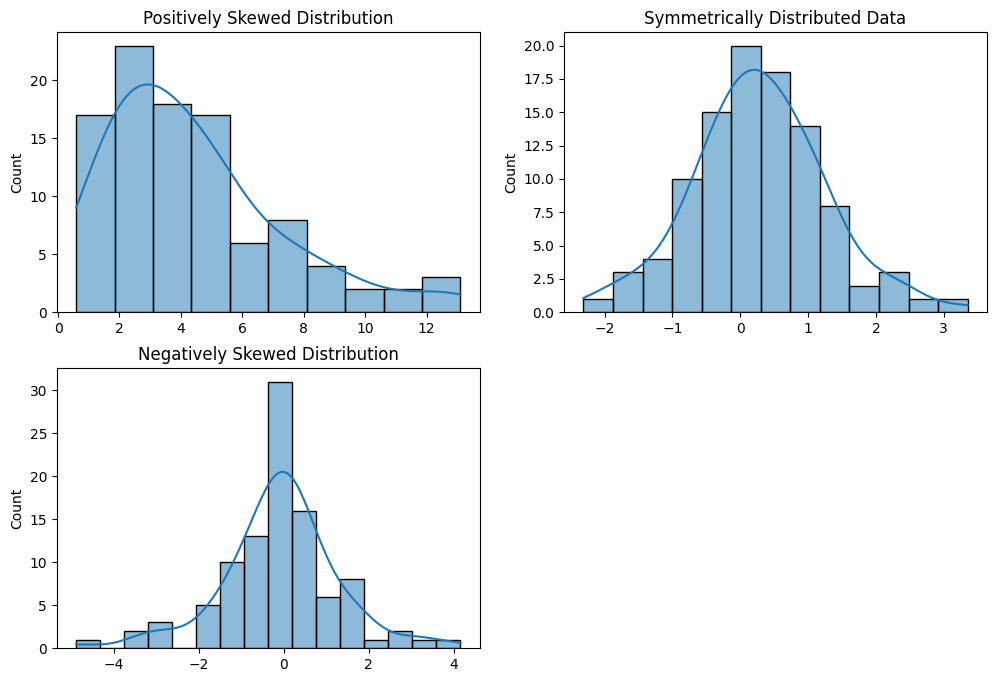

In [35]:
# prompt: Mean, Median, Mode of (positive, symmetrical distribution and negative) skewed and no hist kde  line  diagram allplots in one background

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate data for positively skewed distribution
pos_skewed_data = np.random.chisquare(df=5, size=100)

# Generate data for symmetrically distributed data
symmetric_data = np.random.normal(loc=0, scale=1, size=100)

# Generate data for negatively skewed distribution
neg_skewed_data = np.random.laplace(loc=0, scale=1, size=100)

# Create the figure and subplots
plt.figure(figsize=(12, 8))

# Subplot for positively skewed data
plt.subplot(2, 2, 1)
sns.histplot(pos_skewed_data, kde=True, line_kws={'color': 'red'})

plt.title('Positively Skewed Distribution')

# Subplot for symmetrically distributed data
plt.subplot(2, 2, 2)
sns.histplot(symmetric_data, kde=True, line_kws={'color': 'green'})
plt.title('Symmetrically Distributed Data')

# Subplot for negatively skewed data
plt.subplot(2, 2, 3)
sns.histplot(neg_skewed_data, kde=True, line_kws={'color': 'blue'})

plt.title('Negatively Skewed Distribution')

# Calculate mean, median, and mode for each distribution
pos_mean = np.mean(pos_skewed_data)
pos_median = np.median(pos_skewed_data)
pos_mode = np.argmax(np.bincount(pos_skewed_data))

sym_mean = np.mean(symmetric_data)
sym_median = np.median(symmetric_data)
sym_mode = np.argmax(np.bincount(symmetric_data))

neg_mean = np.mean(neg_skewed_data)
neg_median = np.median(neg_skewed_data)
neg_mode = np.argmax(np.bincount(neg_skewed_data))

# Add text boxes with mean, median, and mode values
plt.text(0.3, 10, f'Mean: {pos_mean:.2f}\nMedian: {pos_median:.2f}\nMode: {pos_mode}', color='red')
plt.text(4, 10, f'Mean: {sym_mean:.2f}\nMedian: {sym_median:.2f}\nMode: {sym_mode}', color='green')
plt.text(-4, 10, f'Mean: {neg_mean:.2f}\nMedian: {neg_median:.2f}\nMode: {neg_mode}', color='blue')

# Show the plot
plt.show()


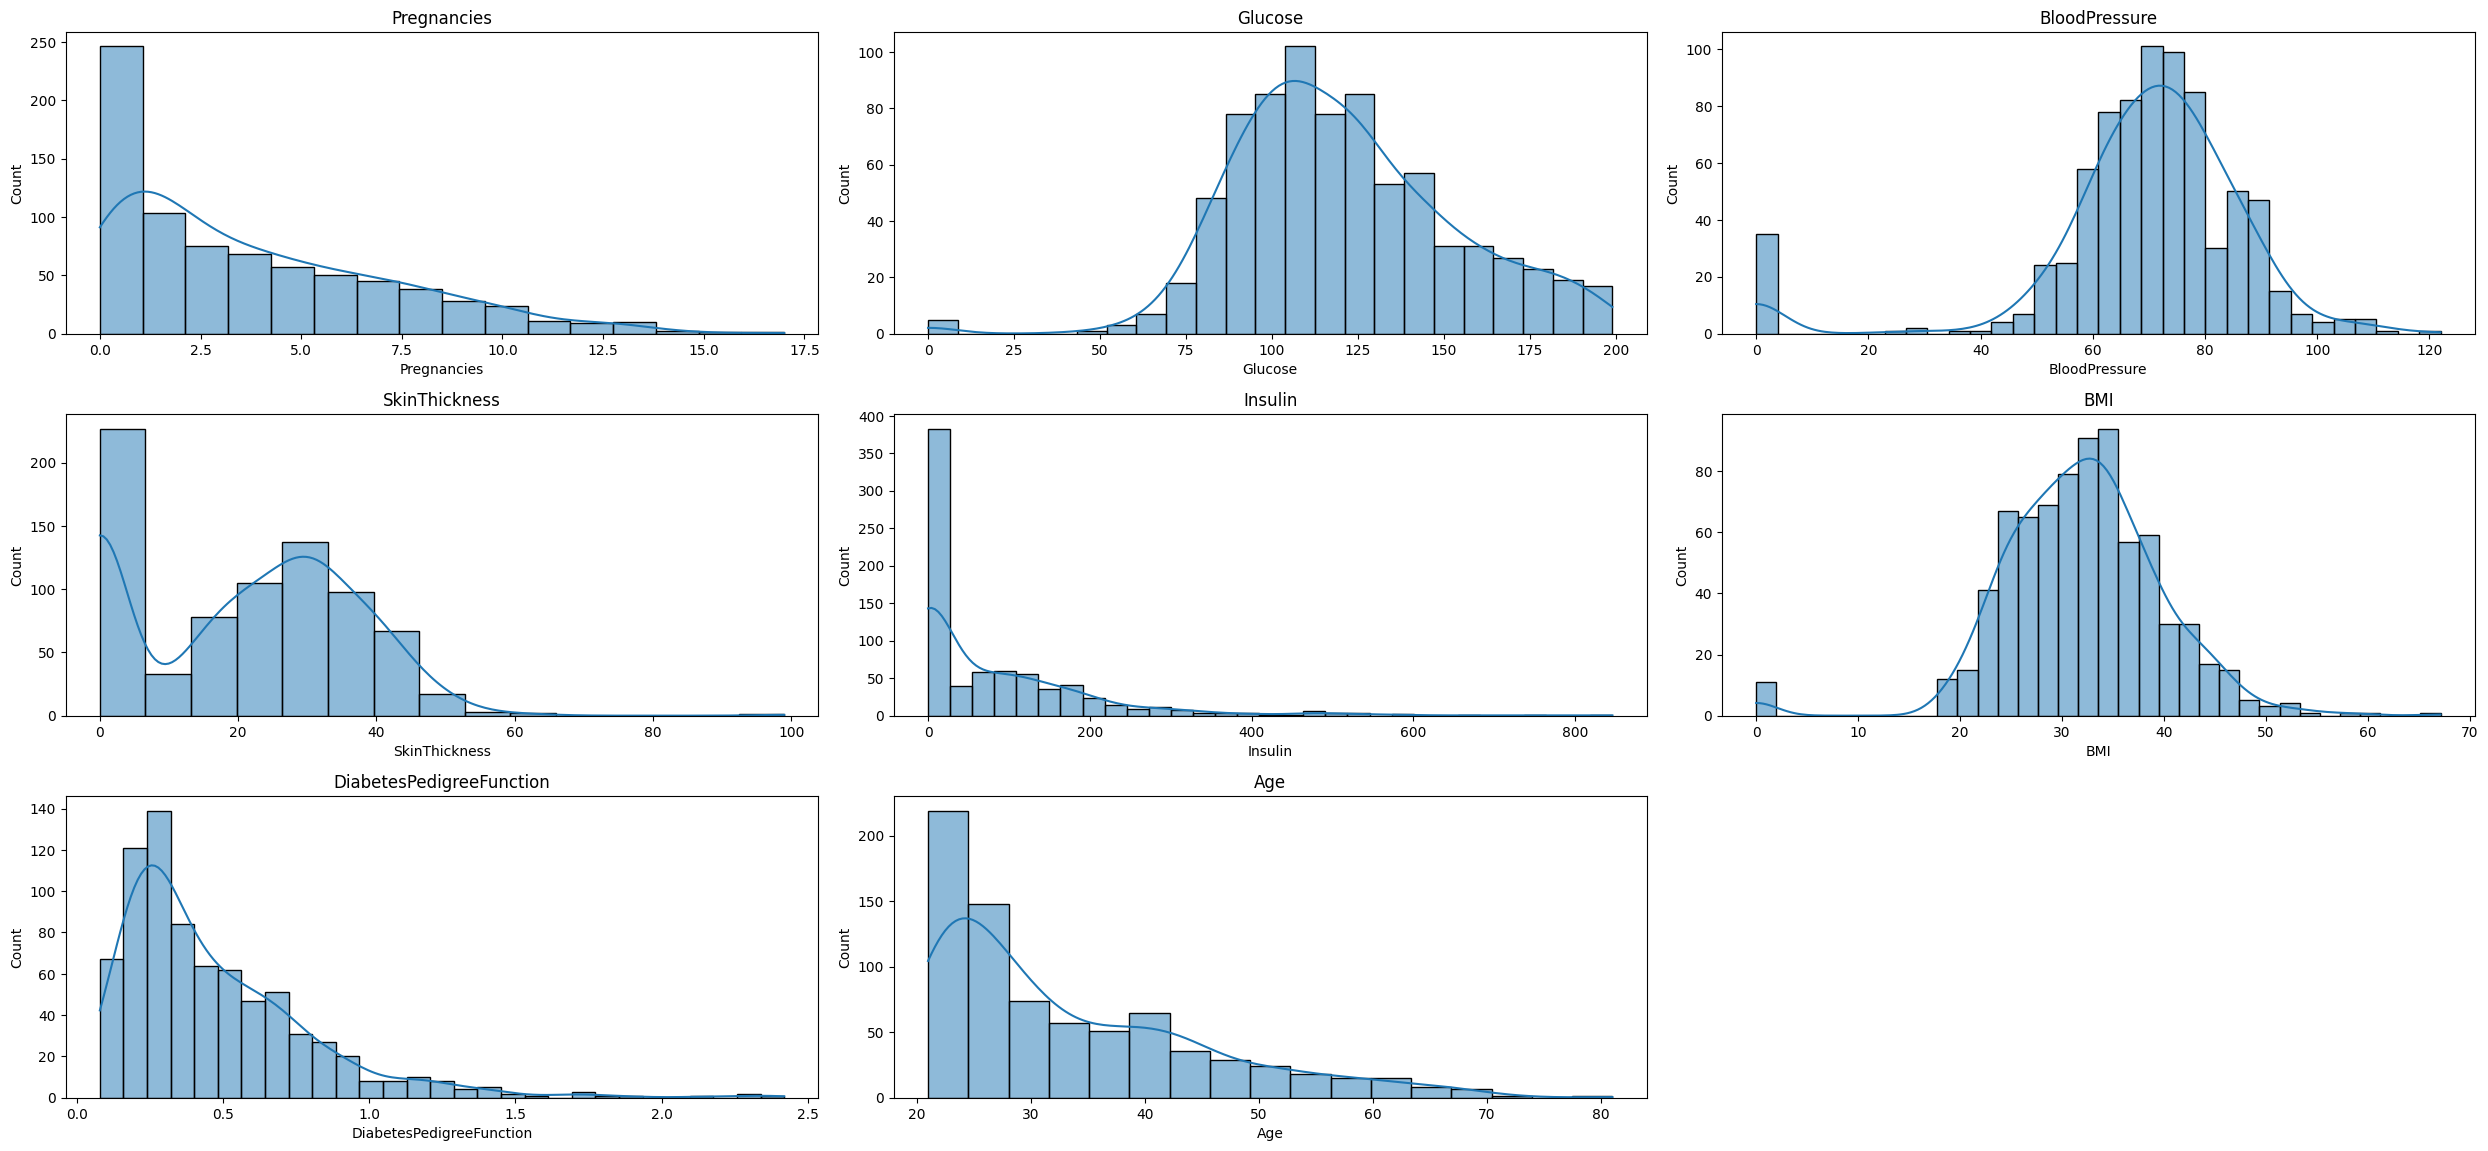

In [36]:
# prompt: Distribution of the feature variables all hist plots with kde enable all plots in big background

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 15))

# Plot histograms for each numeric feature
for i, feature in enumerate(X.columns):
    plt.subplot(4, 3, i + 1)
    sns.histplot(data=X, x=feature, kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()


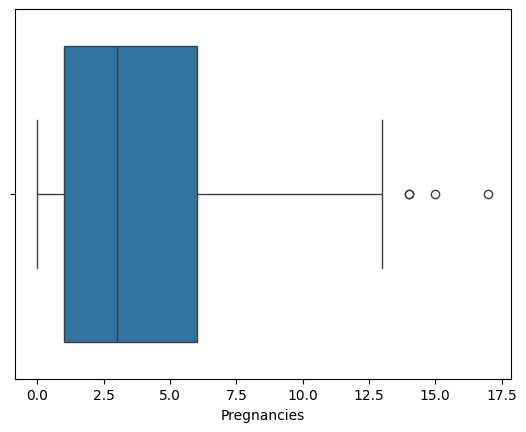

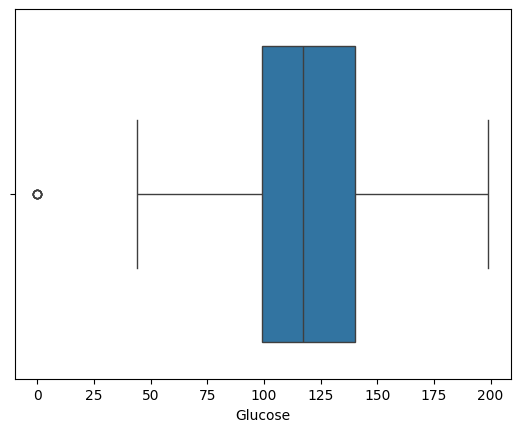

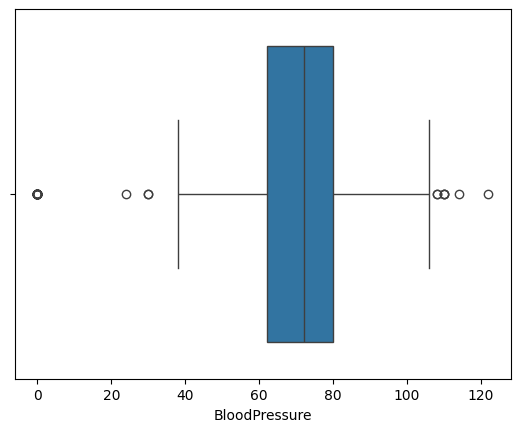

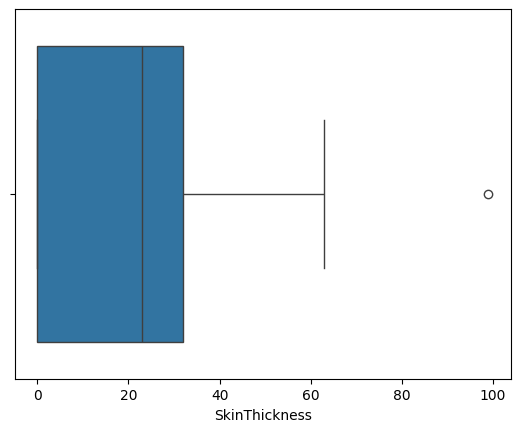

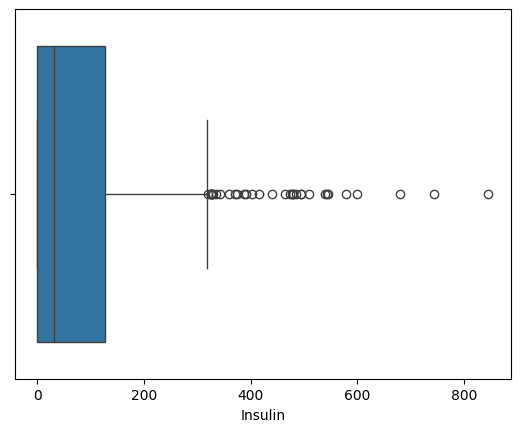

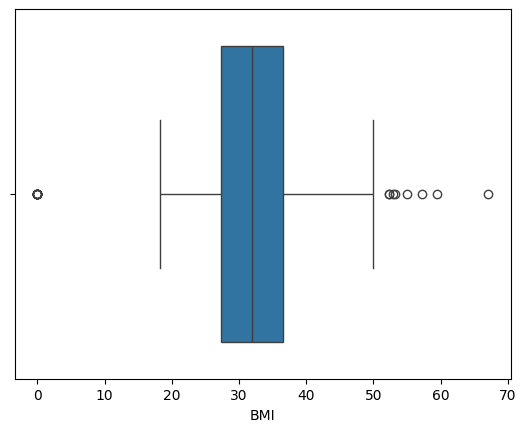

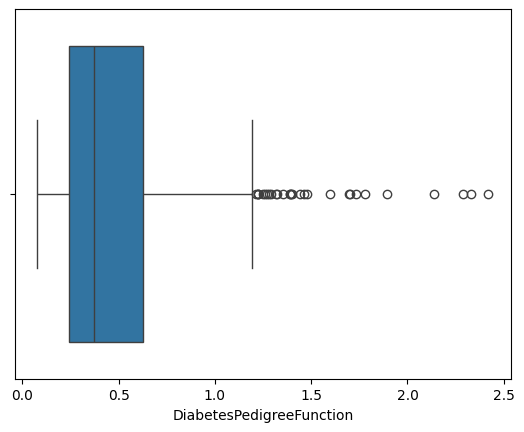

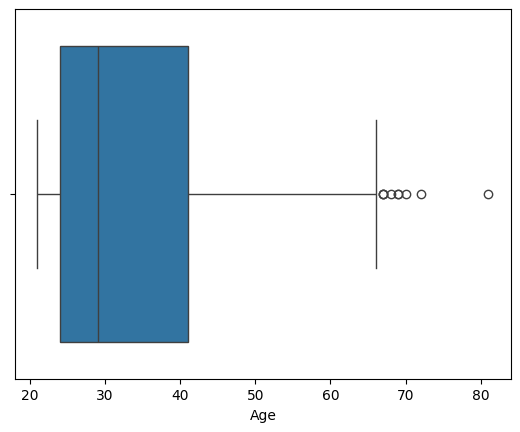

<ipython-input-37-83f183d41128>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[column])


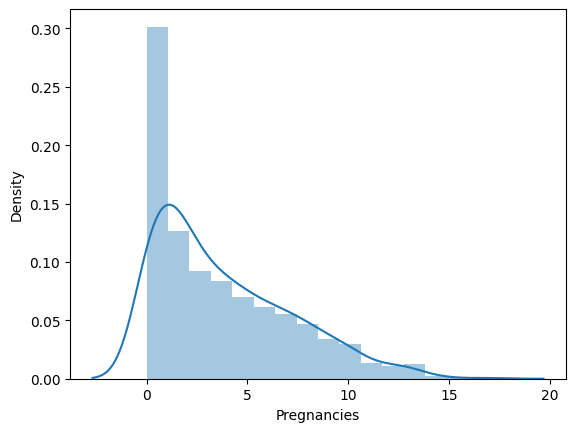

<ipython-input-37-83f183d41128>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[column])


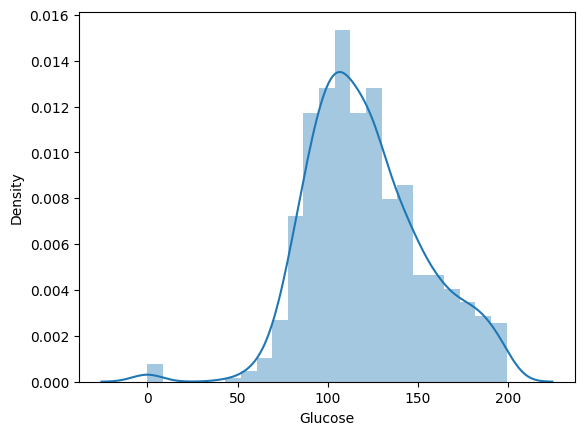

<ipython-input-37-83f183d41128>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[column])


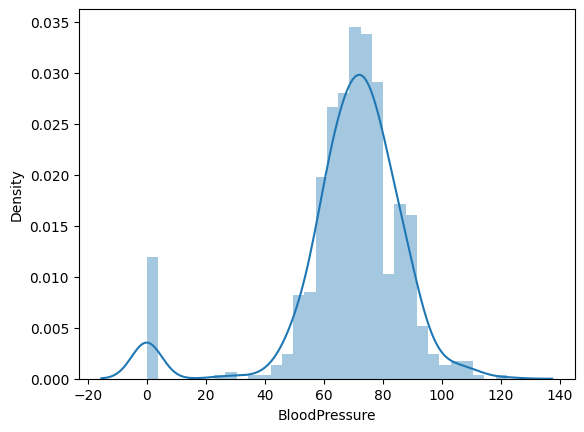

<ipython-input-37-83f183d41128>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[column])


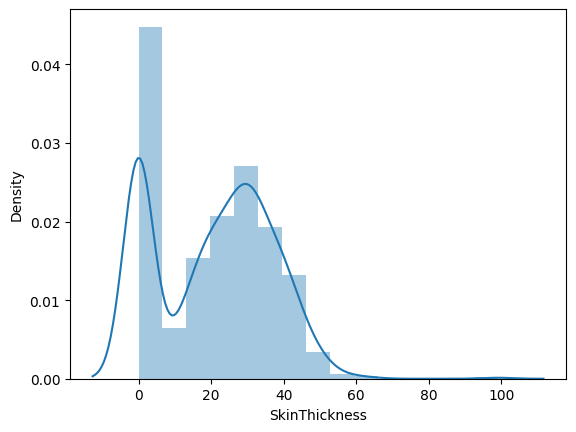

<ipython-input-37-83f183d41128>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[column])


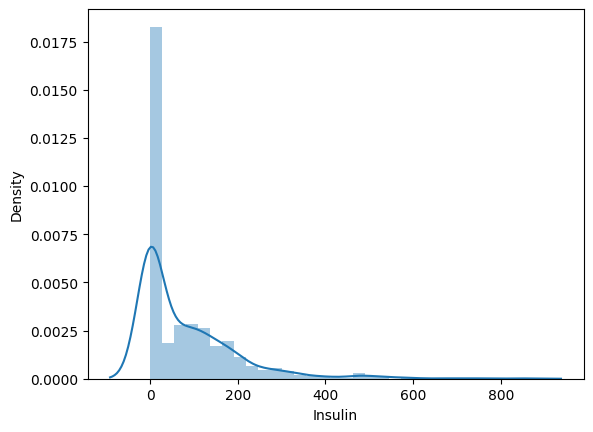

<ipython-input-37-83f183d41128>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[column])


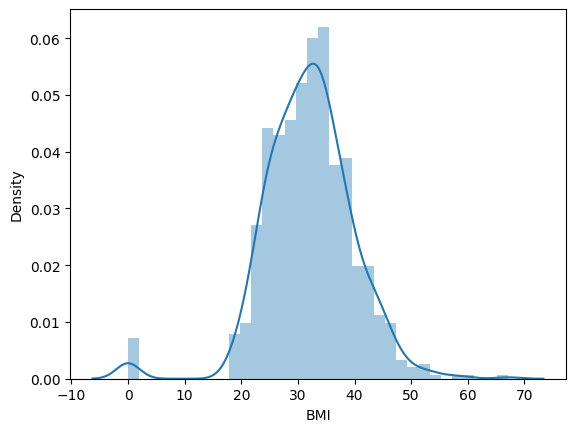

<ipython-input-37-83f183d41128>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[column])


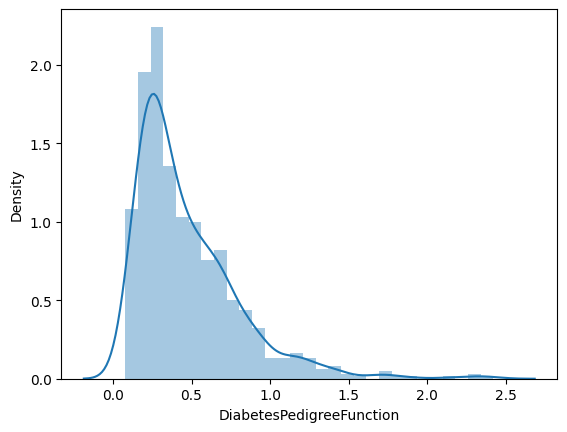

<ipython-input-37-83f183d41128>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[column])


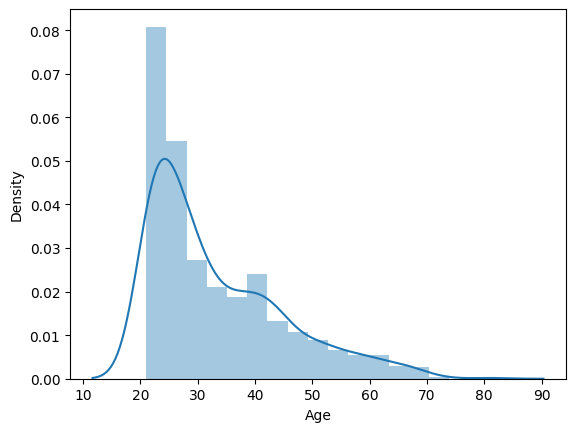

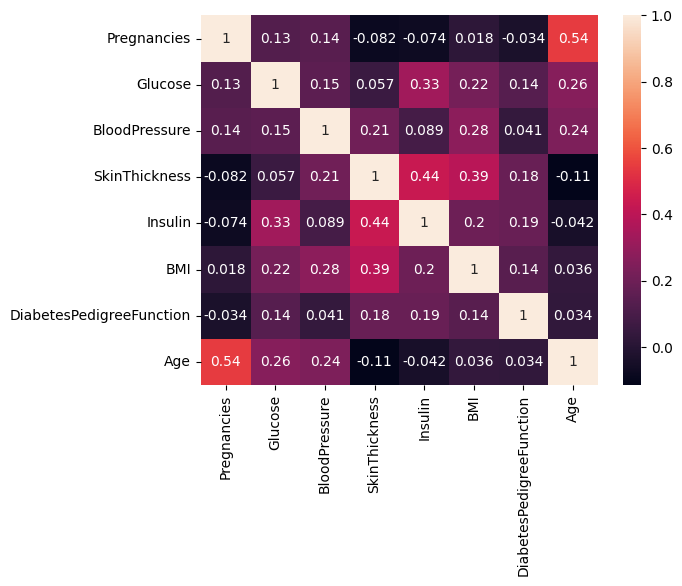

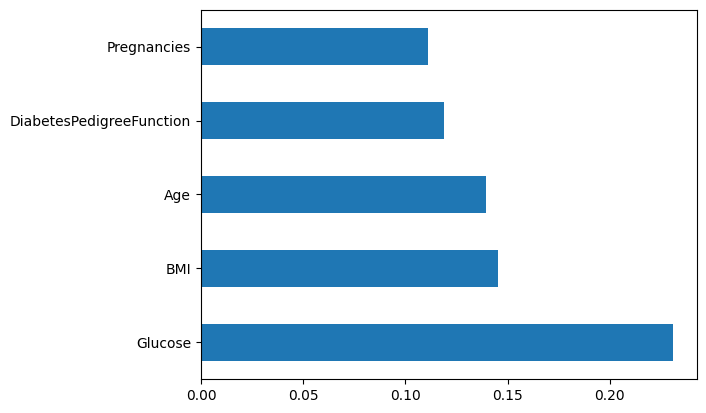

In [37]:
#perform eda on every  attribute for important insights

# Exploratory Data Analysis (EDA)

# 1. Checking for Missing Values
diabetes_dataset.isnull().sum()

# 2. Checking for Outliers
import seaborn as sns
import matplotlib.pyplot as plt

for column in X.columns:
  sns.boxplot(x=X[column])
  plt.show()

# 3. Checking the Distribution of each attribute
for column in X.columns:
  sns.distplot(X[column])
  plt.show()

# 4. Checking the Correlation between attributes
import pandas as pd

correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# 5. Feature Importance
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, Y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(5).plot(kind='barh')
plt.show()


Train Test Split

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [40]:
#perform knn onthis dataset and calculate classification report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Print the classification report
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.77      0.75       100
           1       0.54      0.50      0.52        54

    accuracy                           0.68       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.68      0.67       154



In [41]:
classifier = svm.SVC(kernel='linear')

In [42]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [43]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [44]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


In [45]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [60]:
#calculateclassifcation report forsvm

print('Accuracy score of the test data : ', test_data_accuracy)
print(classification_report(Y_test, X_test_prediction))


Accuracy score of the test data :  0.7727272727272727
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



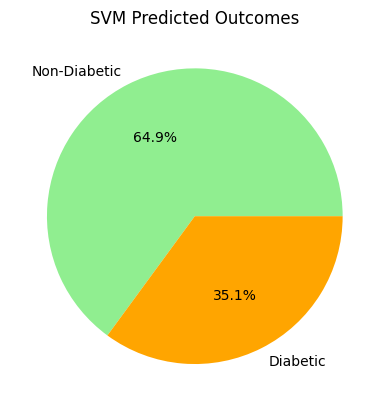

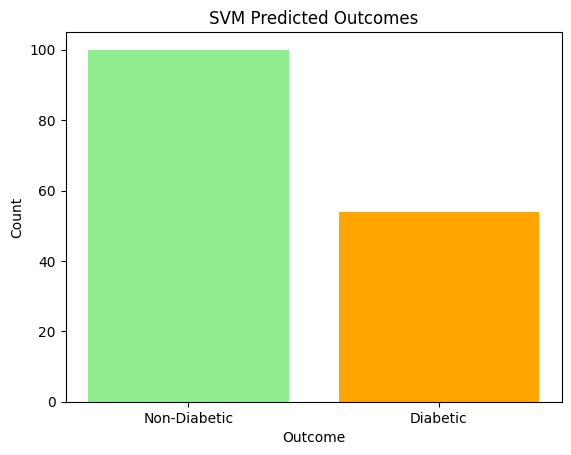

In [47]:
# prompt: generate pie chart and bar chart of outcomes predicting  usng svm classifier

import matplotlib.pyplot as plt
# Pie chart of outcomes predicted by the SVM classifier
labels = ['Non-Diabetic', 'Diabetic']
sizes = [len(Y_test[Y_test == 0]), len(Y_test[Y_test == 1])]
colors = ['lightgreen', 'orange']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('SVM Predicted Outcomes')
plt.show()

# Bar chart of outcomes predicted by the SVM classifier
plt.bar(labels, sizes, color=colors)
plt.title('SVM Predicted Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()


In [57]:
# prompt: Table Confusion Matrix

import pandas as pd
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

# Print the DataFrame
print(cm_df)


          Predicted 0  Predicted 1
Actual 0           91            9
Actual 1           26           28


In [48]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


Making a Predictive System

In [49]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Saving the trained model

In [50]:
import pickle

In [51]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [52]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [53]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
